In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Regressão Linear com Numpy
#Dados Sintéticos
###########################
#Valores Originais do Coeficiente
a,b = 2, 1 
x = np.linspace(0, 1, 10)
fx = a*x + b
np.random.seed(10)
#Ruído dos Dados
noise = np.random.normal(scale=0.15, size=x.shape)
#Dados Sintéticos
y = fx + noise

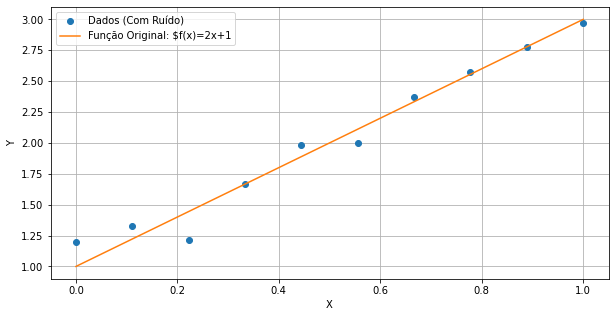

In [6]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', label='Dados (Com Ruído)')
plt.plot(x, fx, label=f"Função Original: $f(x)={a}x+{b}")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [7]:
#Iremos estimar uma função do tipo: y=ax+ba
#Ou seja, devemos achar quais os valores de a e b
#Que melhor representam os dados

#Transformando vetor e coluna
x, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)
#Adicionando o Bias: para estimar o termo b
X = np.hstack((x, np.ones(x.shape)))

#Estimando a e b
beta = np.linalg.pinv(X).dot(y)
print("a estimado", beta[0][0])
print("b estimado", beta[1][0])

a estimado 1.9117788551106178
b estimado 1.0530818186658104


In [8]:
#Predições
y_pred = X.dot(beta)

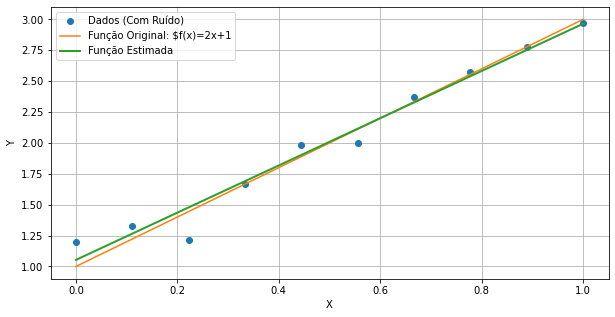

In [9]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', label='Dados (Com Ruído)')
plt.plot(x, fx, label=f"Função Original: $f(x)={a}x+{b}")
plt.plot(x, y_pred, lw=2, label=f"Função Estimada")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [10]:
#UTILIZANDO O SCIKIT-LEARN
from sklearn.linear_model import LinearRegression

In [11]:
#Treinando o Modelo
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [12]:
#Predições
y_pred = reg.predict(x)

In [13]:
#Coeficientes a,b estimados
print("a estimado com LinearRegression", reg.coef_.ravel()[0])
print("b estimado com LinearRegression", reg.intercept_[0])

a estimado com LinearRegression 1.9117788551106172
b estimado com LinearRegression 1.05308181866581


In [14]:
#AVALIANDO O MODELO DE REGRESSÃO
#Método Score, calcula o R2 do modelo

score = reg.score(x, y)
score

0.9689467401989461

In [19]:
#FUNÇÃO PARA CALCULO DO MSE
def mse(y_true, y_pred, is_ref = False):
    #MSE Modelo
    if is_ref:
        mse = ((y_true - y_true.mean())**2).mean()
    else:
        mse = ((y_true - y_pred)**2).mean()
    return mse

In [16]:
#FUNÇÃO PARA CALCULAR O COEFICIENTE DE DETERMINAÇÃO R2
def r2(mse_reg, mse_ref):
    return 1 - mse_reg/mse_ref

In [20]:
#Calculando os MSE
mse_reg = mse(y_true = y, y_pred = y_pred)
print("MSE do modelo de regressão: ", mse_reg)
mse_ref = mse(y_true = y, y_pred = y_pred, is_ref=True)
print("MSE do modelo de referência: ", mse_ref)

MSE do modelo de regressão:  0.011930304493574708
MSE do modelo de referência:  0.3841884739318032


In [21]:
#Calculando o R2 Score
r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)
print("Coeficiente R2 do modelo implementado:", r2_score)
print("Coeficiente R2 do modelo scikt-learn :", score)

Coeficiente R2 do modelo implementado: 0.9689467401989461
Coeficiente R2 do modelo scikt-learn : 0.9689467401989461


In [22]:
#Validação de Modelos
#Dados Sintéticos
x = np.linspace(-1, 1, 50)
fx = 2*x + 1 #Geratriz
np.random.seed(10)
#Ruido
noise = np.random.normal(scale=0.5,size=x.shape)
y = fx + noise

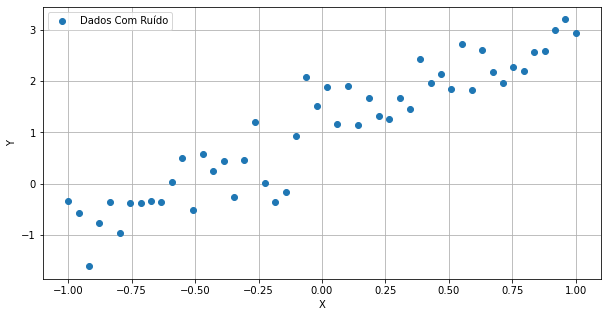

In [24]:
#PLot
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', label="Dados Com Ruído")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [25]:
#Transformando em coluna
X, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

In [26]:
#Divisão teste/treino
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

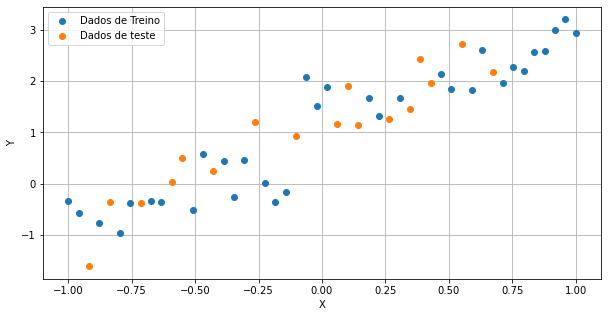

In [48]:
#Plot dos dados
plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label = "Dados de Treino")
plt.plot(X_test, y_test, 'o', label = "Dados de teste")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [50]:
#Treinando o Modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [51]:
#Predições
y_pred = reg.predict(X_test)
#Para fins didáticos
y_pred_train = reg.predict(X_train)

In [54]:
#MSE
from sklearn.metrics import mean_squared_error

In [56]:
#MSE Regressão
mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_teste = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("MSE treino:", mse_train)
print("MSE teste:", mse_teste)

MSE treino: 0.21241332573416805
MSE teste: 0.1905413706674759


In [59]:
#Score no Treino e Teste
score_train = reg.score(X_train, y_train)
score_teste = reg.score(X_test, y_test)
print("R2 treino: ", score_train)
print("R2 teste: ", score_teste)

R2 treino:  0.8727502321388257
R2 teste:  0.8442929391427019


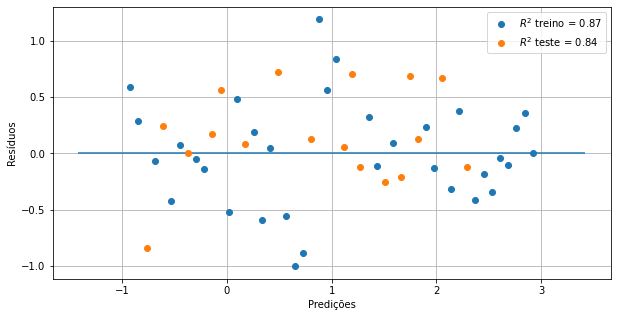

In [64]:
#Plot dos Resíduos
plt.figure(figsize=(10,5))
plt.plot(y_pred_train, y_train-y_pred_train, 'o', label="$R^2$ treino = {:.2f}".format(score_train))
plt.plot(y_pred, y_test-y_pred, 'o', label="$R^2$ teste = {:.2f}".format(score_teste))
plt.hlines(y = 0, xmin=y_pred_train.min()-0.5, xmax=y_pred_train.max()+0.5)
plt.legend()
plt.xlabel("Predições")
plt.ylabel("Resíduos")
plt.grid()
plt.show()

In [75]:
#Regressão com Problemas Não Lineares
#Dados Sintéticos
x = np.linspace(-np.pi, np.pi, 100)
fx = np.sin(x) #Geratriz
np.random.seed(10)
#Ruido
noise = np.random.normal(scale=0.5,size=x.shape)
y = fx + noise

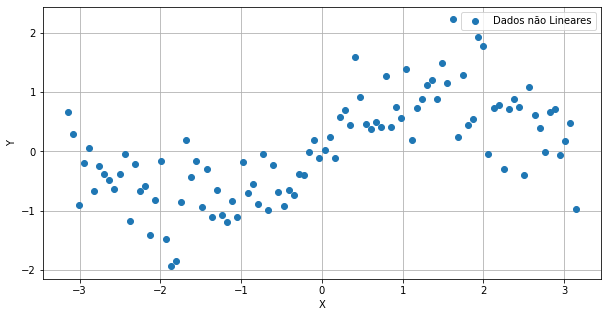

In [76]:
#PLot
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', label="Dados não Lineares")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [77]:
#Transformando vetor para vetor coluna
x, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

In [78]:
#Transformação Polinomial: Transformando as features e utilizando do mesmo modelo linear

def polynomial_features(x, d = 2):
    #X = [x**1, x**2, ... x**d]
    X = np.hstack([x**i for i in range(1, d+1)])
    return X


In [79]:
#Gerando as Features Polinomiais
d = 3
X = polynomial_features(x, d=d)
print("Dimensão de X:", X.shape)

Dimensão de X: (100, 3)


In [80]:
#Divisão em Treino e Teste
X_train, X_test, y_train, y_teste = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [81]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [84]:
#MSE Regressão
mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_teste = mean_squared_error(y_true=y_teste, y_pred = y_pred)
print("Mse do Treinamento: ", mse_train)
print("MSE do Teste: ", mse_teste)

Mse do Treinamento:  0.22264835963896093
MSE do Teste:  0.27032717327334355


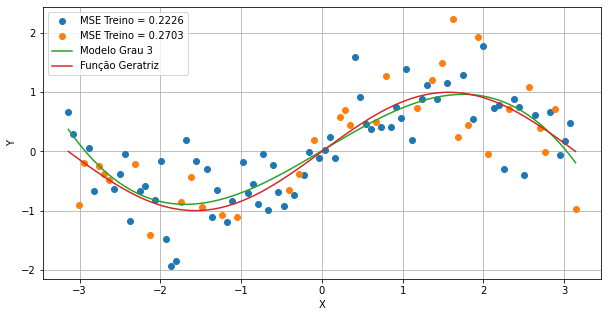

In [100]:
#Visuzaliação da Predição
#Aumentando a Resolução
x_grid = np.linspace(-np.pi, np.pi, 100).reshape(-1,1)
y_pred_grid = reg.predict(polynomial_features(x_grid, d=d))
plt.figure(figsize=(10,5))
plt.plot(X_train[:, 0], y_train, 'o', label="MSE Treino = {:.4f}".format(mse_train))
plt.plot(X_test[:, 0], y_teste, 'o', label="MSE Treino = {:.4f}".format(mse_teste))
plt.plot(x_grid, y_pred_grid, label=f"Modelo Grau {d}")
plt.plot(x_grid, np.sin(x_grid), label="Função Geratriz")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()